In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from joblib import load
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
path_interim = '/home/arfrech/Documents/Cursos/data science/Projects/cybersecurity - TCC/tcc-dsa/data/interim'
df = pd.read_csv(f'{path_interim}/metricas_avaliacao.csv',sep=';')

In [28]:
df.head(1)

,target,model,accuracy,precision,recall,f1,train_time_s
0,class,knn,0.999742,0.999742,0.999742,0.999742,141.96691


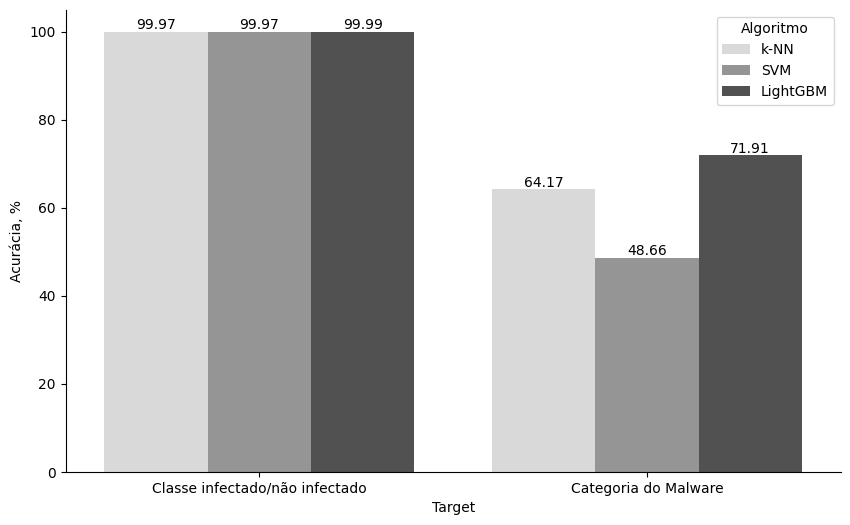

In [12]:
df = pd.DataFrame(data={'target':['class','class','class','category','category','category'],
                        'model':['knn','svm','lgbm','knn','svm','lgbm'],
                        'accuracy':[0.9997,0.9997,0.9999,0.6417,0.4866,0.7191]})
df_to_plot = df.rename(columns={'model':'Algoritmo','target':'Target','accuracy':'Acurácia, %'})
df_to_plot['Target'] = df_to_plot['Target'].map({'class':'Classe infectado/não infectado','category':'Categoria do Malware','family':'Família do Malware'})
df_to_plot['Algoritmo'] = df_to_plot['Algoritmo'].map({'knn':'k-NN','svm':'SVM','lgbm':'LightGBM'})
df_to_plot['Acurácia, %'] = df_to_plot['Acurácia, %'].mul(100).round(2)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_to_plot,x='Target',y='Acurácia, %',hue='Algoritmo',palette='Greys')
for container in ax.containers:
    ax.bar_label(container)
sns.despine()
plt.show()

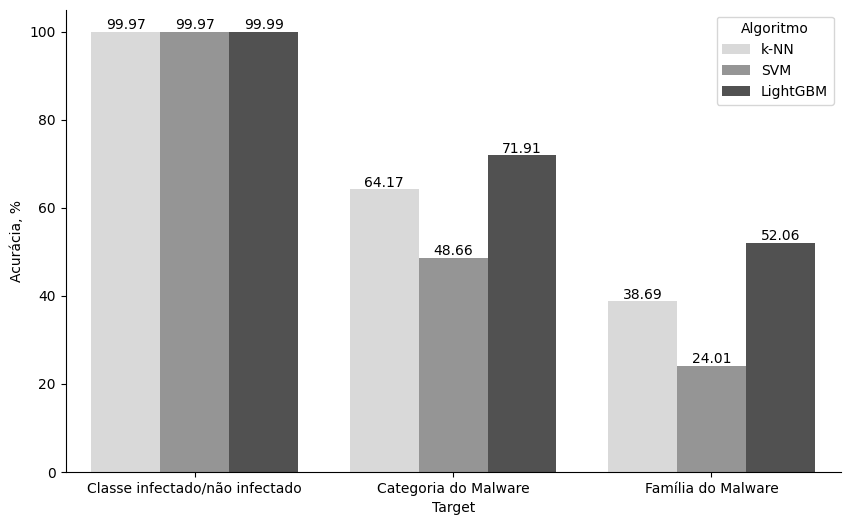

In [135]:
# old, não rodar!
df_to_plot = df.rename(columns={'model':'Algoritmo','target':'Target','accuracy':'Acurácia, %'})
df_to_plot['Target'] = df_to_plot['Target'].map({'class':'Classe infectado/não infectado','category':'Categoria do Malware','family':'Família do Malware'})
df_to_plot['Algoritmo'] = df_to_plot['Algoritmo'].map({'knn':'k-NN','svm':'SVM','lgbm':'LightGBM'})
df_to_plot['Acurácia, %'] = df_to_plot['Acurácia, %'].mul(100).round(2)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_to_plot,x='Target',y='Acurácia, %',hue='Algoritmo',palette='Greys')
for container in ax.containers:
    ax.bar_label(container)
sns.despine()
plt.show()

In [ ]:
df.rename(columns={'model':'Algoritmo','target':'Target','f1':'Acurácia, %'})

In [5]:
path_model = '/home/arfrech/Documents/Cursos/data science/Projects/cybersecurity - TCC/tcc-dsa/models/resultados_preliminares'
predicoes = load(f'{path_model}/predicoes_20231219.joblib')

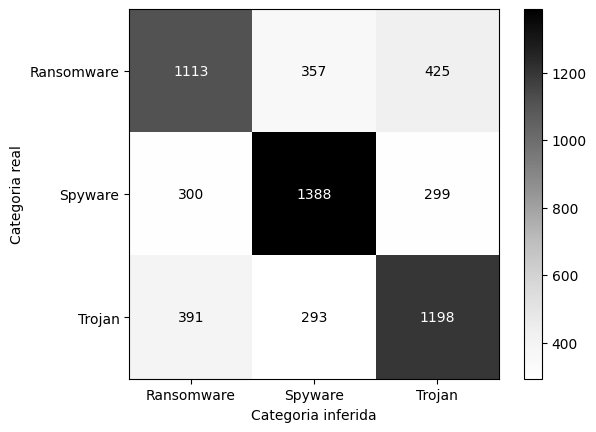

In [54]:
labels = ['Ransomware','Spyware','Trojan']
y = predicoes['y_category']
yhat = predicoes['yhat_category_knn']

cm = confusion_matrix(y,yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(cmap='Greys')
plt.xlabel('Categoria inferida')
plt.ylabel('Categoria real')
plt.show()

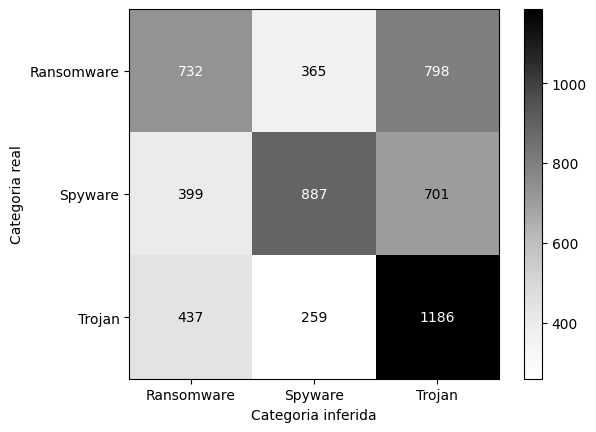

In [55]:
labels = ['Ransomware','Spyware','Trojan']
y = predicoes['y_category']
yhat = predicoes['yhat_category_svm']

cm = confusion_matrix(y,yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(cmap='Greys')
plt.xlabel('Categoria inferida')
plt.ylabel('Categoria real')
plt.show()

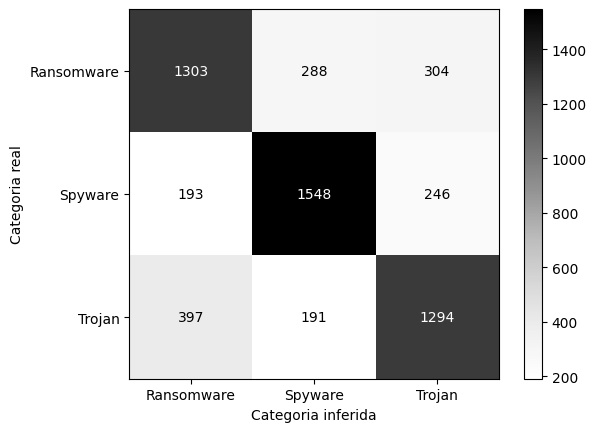

In [53]:
labels = ['Ransomware','Spyware','Trojan']
y = predicoes['y_category']
yhat = predicoes['yhat_category_lgbm']

cm = confusion_matrix(y,yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(cmap='Greys')
plt.xlabel('Categoria inferida')
plt.ylabel('Categoria real')
plt.show()

In [ ]:
ConfusionMatrixDisplay()

In [7]:
prf0 = pd.DataFrame()
tgt_name = 'category'

for model_name in ['knn','svm','lgbm']:

    labels_tgt = [v for v in predicoes[f'cod_{tgt_name}'].values() if v not in ['Benign']]
    report = classification_report(predicoes[f'y_{tgt_name}'],predicoes[f'yhat_{tgt_name}_{model_name}'],target_names=labels_tgt,output_dict=True)
    temp = pd.DataFrame(report).T
    temp['model'] = model_name
    temp = temp.reset_index().rename(columns={'index':tgt_name})[[tgt_name,'model','precision','recall','f1-score']].iloc[:-3,:]
    prf0 = pd.concat([prf0,temp],axis=0,ignore_index=True)

In [114]:
prf0.head(1)

,category,model,precision,recall,f1-score
0,Ransomware,knn,0.616962,0.587335,0.601784


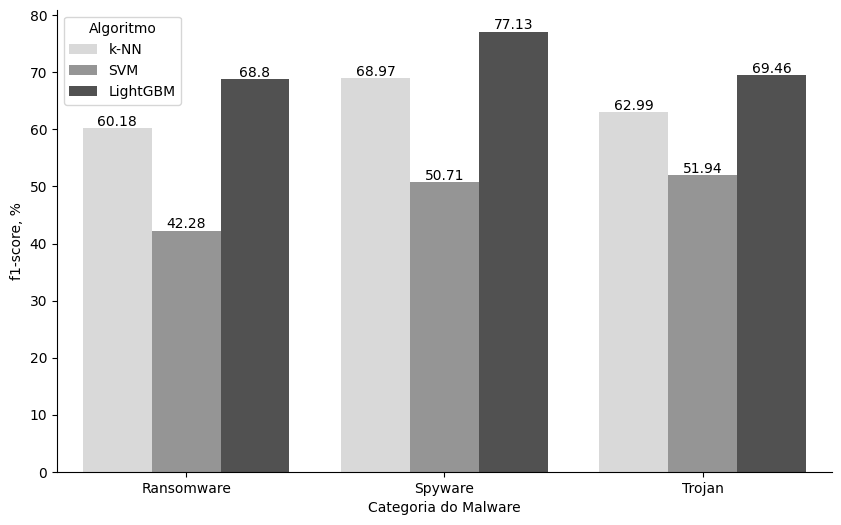

In [9]:
prf0_plot = prf0.rename(columns={'category':'Categoria do Malware','model':'Algoritmo','f1-score':'f1-score, %'})
prf0_plot['Algoritmo'] = prf0_plot['Algoritmo'].map({'knn':'k-NN','svm':'SVM','lgbm':'LightGBM'})
prf0_plot['f1-score, %'] = prf0_plot['f1-score, %'].mul(100).round(2)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=prf0_plot,x='Categoria do Malware',y='f1-score, %',hue='Algoritmo',palette='Greys')
for container in ax.containers:
    ax.bar_label(container)
sns.despine()
plt.show()

In [94]:
prf1 = pd.DataFrame()
tgt_name = 'family'

for model_name in ['knn','svm','lgbm']:

    family_labels = [v for v in predicoes[f'cod_{tgt_name}'].values() if v not in ['Benign']]
    report = classification_report(predicoes[f'y_{tgt_name}'],predicoes[f'yhat_{tgt_name}_{model_name}'],target_names=family_labels,output_dict=True)
    temp = pd.DataFrame(report).T
    temp['model'] = model_name
    temp = temp.reset_index().rename(columns={'index':tgt_name})[[tgt_name,'model','precision','recall','f1-score']].iloc[:-3,:]
    prf1 = pd.concat([prf1,temp],axis=0,ignore_index=True)

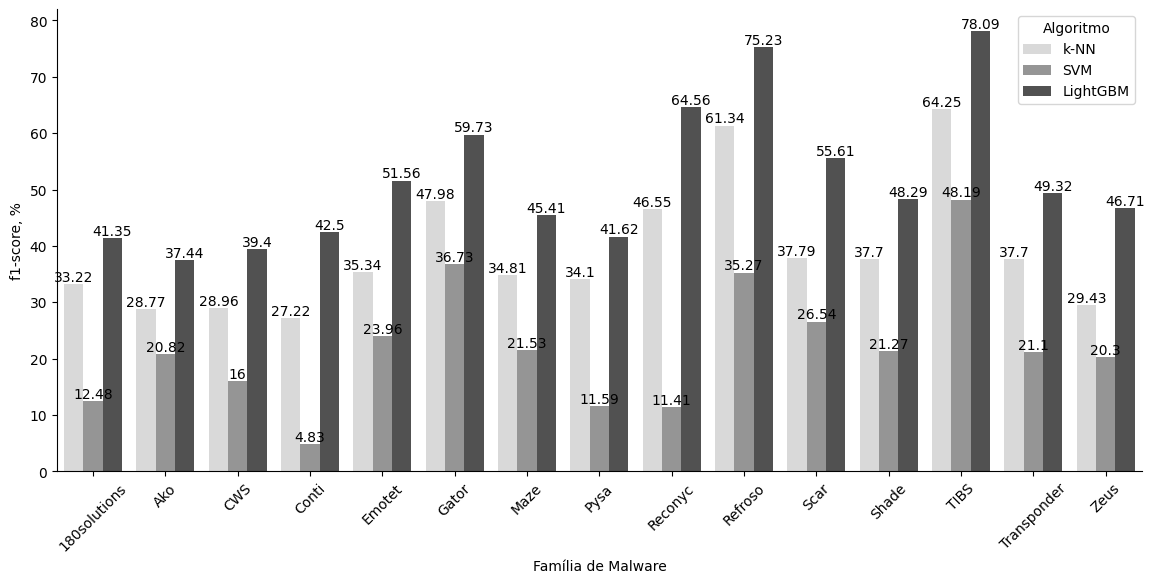

In [133]:
prf1_plot = prf1.rename(columns={'family':'Família de Malware','model':'Algoritmo','f1-score':'f1-score, %'})
prf1_plot['Algoritmo'] = prf1_plot['Algoritmo'].map({'knn':'k-NN','svm':'SVM','lgbm':'LightGBM'})
prf1_plot['f1-score, %'] = prf1_plot['f1-score, %'].mul(100).round(2)

plt.figure(figsize=(14,6))
ax = sns.barplot(data=prf1_plot,x='Família de Malware',y='f1-score, %',hue='Algoritmo',palette='Greys')
for container in ax.containers:
    ax.bar_label(container)
ax.tick_params(axis='x',labelrotation=45)
sns.despine()
plt.show()